In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ridge regression

In [12]:
with open('data/3/hw1_ridge_x.dat') as f:
    x = np.array([ [float(oo) for oo in o.strip().split(',')] for o in f.readlines() if o.strip() != ''])
with open('data/3/hw1_ridge_y.dat') as f:
    y = np.array([ float(o) for o in f.readlines() if o.strip() != ''])

In [16]:
x_val, y_val = x[:10, :], y[:10]
x_train, y_train = x[10:, :], y[10:]

In [17]:
len(x_val), len(x_train)

(10, 40)

### 1. 

$w = (XX^T+n\lambda I)^{-1} X^T y $

In [28]:
def ridge_regression(train_x, train_y, l):
    w = np.linalg.inv(np.dot(train_x.T, train_x) + len(train_x) * l * np.identity(train_x.shape[1])).dot(np.dot(train_x.T, train_y))  
    return w

In [29]:
ridge_regression(x_train, y_train, 0.15)

array([-0.57939825,  1.15033028,  0.04934122, -1.59867896])

### 2.

In [62]:
loss_function = lambda x, y, w: np.mean(np.square(np.dot(x, w)-y))

In [69]:
train_loss, val_loss = [], []
r = list(range(0, -6, -1))
for i in r:
    w = ridge_regression(x_train, y_train, 10**i)
    train_loss.append(loss_function(x_train, y_train, w))
    val_loss.append(loss_function(x_val, y_val, w))

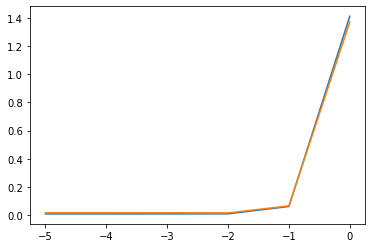

In [70]:
plt.plot(r, train_loss)
plt.plot(r, val_loss)

In [75]:
f"The best lambda for the validation dataset is {10**r[np.argmin(val_loss)]}"

'The best lambda for the validation dataset is 0.01'